# Face Recognition program using Open CV 
**Kumar Shivraj Bhakat** **21BTRCL055**

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
path = r"C:\Users\bhaka\Desktop\shivface.jpg"

1. import cv2: Imports the OpenCV library, which is a popular open-source computer vision and machine learning software library.
2. import matplotlib.pyplot as plt: Imports the Matplotlib library for plotting graphs and images.
3. import numpy as np: Imports the NumPy library, which is commonly used for numerical computing in Python.
4. path = r"C:\Users\bhaka\Desktop\4x6 pp shivface.jpg": Defines the path to an image file named "4x6 pp shivface.jpg". The 'r' before the string denotes a raw string literal, which is used to ignore escape characters like ''.

In [2]:
print(path)

C:\Users\bhaka\Desktop\shivface.jpg


In [3]:
img = cv2.imread(path)
#imread() is used to read the image

In [4]:
print(img)

[[[ 42  48  61]
  [ 46  52  65]
  [ 54  60  73]
  ...
  [187 238 255]
  [178 234 253]
  [173 229 248]]

 [[ 41  47  60]
  [ 43  49  62]
  [ 50  56  69]
  ...
  [185 235 253]
  [180 232 249]
  [175 226 246]]

 [[ 41  47  60]
  [ 38  44  57]
  [ 44  50  63]
  ...
  [192 236 253]
  [186 232 249]
  [183 229 247]]

 ...

 [[ 71  60  63]
  [ 72  61  64]
  [ 73  62  65]
  ...
  [ 57  45  57]
  [ 56  44  56]
  [ 55  43  55]]

 [[ 71  60  63]
  [ 71  60  63]
  [ 70  59  62]
  ...
  [ 60  48  60]
  [ 59  47  59]
  [ 58  46  58]]

 [[ 70  59  62]
  [ 69  58  61]
  [ 68  57  60]
  ...
  [ 62  50  62]
  [ 61  49  61]
  [ 60  48  60]]]


This code uses the OpenCV library in Python to read an image file from the specified imagePath and store it in the img variable.
• The cv2.imread() function takes the file path as an argument and returns a NumPy array representing the image.
• This array can then be manipulated or processed using other OpenCV functions.

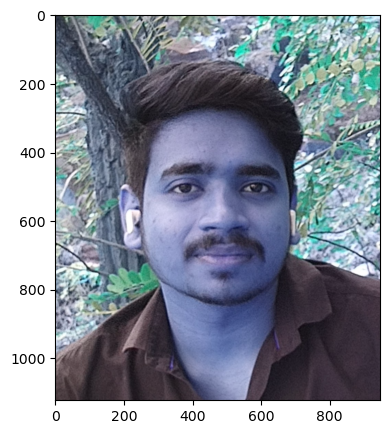

In [5]:
plt.figure(figsize=(15,5))
plt.imshow(img)
plt.show()

As python use BGR colour composition so we need to conver it into RGB for proper image

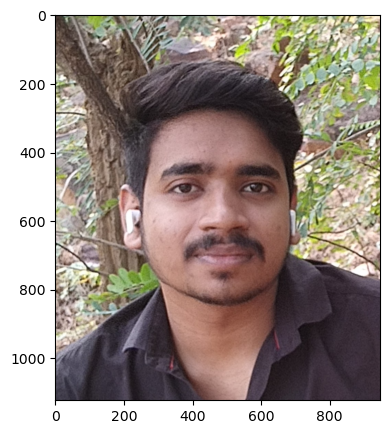

In [6]:
plt.figure(figsize=(5,5))
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

1. **plt.figure(figsize=(5, 5))**: This line creates a new figure for the plot with a specified size of 5 inches in width and 5 inches in height.

2. **plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))**: This function displays the image (`img`) after converting it from BGR to RGB color space using `cv2.cvtColor()`. Matplotlib expects images to be in RGB format, so this conversion ensures that the image is displayed correctly. 

3. **plt.show()**: This line displays the plot with the image.

Overall, this code segment will display the original BGR image (`img`) using Matplotlib with the specified dimensions. The image will be converted to RGB format before display to ensure proper color representation.

In [7]:
img.shape

(1123, 947, 3)

The shape attribute returns a tuple that contains the dimensions of the image.
1. The first element of the tuple is the height of the image
2. The second element is the width of the image.
3. The third element (if present) is the number of color channels in the image.

In [8]:
gray_image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

To convert the image into grey we will again use **cv2.cvtColor()**, as we know it take 2 parameters:
1. image
2. color converter attribute **cv2.COLOR_BGR2GRAY**

In [9]:
gray_image.shape

(1123, 947)

In [10]:
face_classifier = cv2.CascadeClassifier(
    cv2.data.haarcascades + "haarcascade_frontalface_default.xml")

1. **CascadeClassifier**: This is a class provided by the OpenCV library for object detection. It works by applying a cascade of classifiers to detect objects. In this case, it's used for face detection.

2. **cv2.data.haarcascades**: This is a path provided by OpenCV to access pre-trained Haar cascade files. These cascade files contain the necessary information for detecting specific objects, such as faces, eyes, or smiles.

3. **"haarcascade_frontalface_default.xml"**: This is the filename of the specific Haar cascade file for detecting frontal faces. It's a pre-trained model that OpenCV provides for face detection. The ".xml" extension indicates that it's an XML file containing the classifier information.

4. **cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_frontalface_default.xml")**: This line instantiates a `CascadeClassifier` object for detecting faces using the frontal face cascade classifier. The path to the cascade classifier file is constructed by concatenating `cv2.data.haarcascades` and the filename `"haarcascade_frontalface_default.xml"`.

In [11]:
face = face_classifier.detectMultiScale(
    gray_image, scaleFactor=1.1, minNeighbors=10, minSize=(40, 40)
)

The pre-trained face classifier (`face_classifier`) to detect faces in a grayscale image (`gray_image`)
1. **gray_image**: This is the input grayscale image in which faces will be detected.

2. **scaleFactor**: This parameter specifies how much the image size is reduced at each image scale. It is used to create a scale pyramid. A value of 1.1 means that the image is reduced by 10% at each scale. This parameter helps in detecting faces of different sizes.

3. **minNeighbors**: This parameter specifies how many neighbors each candidate rectangle should have to retain it. It helps in filtering out false positives. Increasing this value reduces the number of detected faces but improves accuracy by requiring more overlapping detections to be considered as a face.

4. **minSize**: This parameter specifies the minimum possible size of the face. Any detected object smaller than this size is ignored. It's a tuple `(width, height)` representing the minimum size of the detected face in pixels.

The `detectMultiScale()` function returns a list of rectangles, where each rectangle represents a detected face. The `face` variable will contain this list of rectangles after the function call. Each rectangle is represented as a tuple `(x, y, w, h)` where `(x, y)` is the top-left corner of the rectangle, and `(w, h)` are its width and height, respectively.

In [12]:
for (x, y, w, h) in face:
    cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 4)

This loop iterates over each detected face (represented as a rectangle with coordinates `(x, y, w, h)`) and draws a green rectangle around it on the original color image (`img`).

1. **Loop**: `for (x, y, w, h) in face:`: This loop iterates over each detected face in the `face` variable. For each iteration, it unpacks the tuple `(x, y, w, h)` representing the coordinates and size of the detected face.

2. **Drawing Rectangle**: `cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 4)`: This function draws a rectangle on the original color image (`img`) using the `cv2.rectangle()` function. It takes the following arguments:
   - `img`: The original image on which the rectangle will be drawn.
   - `(x, y)`: The coordinates of the top-left corner of the rectangle.
   - `(x + w, y + h)`: The coordinates of the bottom-right corner of the rectangle, calculated by adding the width `w` and height `h` to the top-left coordinates.
   - `(0, 255, 0)`: The color of the rectangle. In this case, it's green, represented as `(0, 255, 0)` in BGR format.
   - `4`: The thickness of the rectangle's border. This value can be adjusted to change the thickness of the border.

By drawing rectangles around the detected faces, this code visually highlights the locations of the detected faces on the original color image.

In [13]:
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

In [14]:
img_rgb

array([[[ 61,  48,  42],
        [ 65,  52,  46],
        [ 73,  60,  54],
        ...,
        [255, 238, 187],
        [253, 234, 178],
        [248, 229, 173]],

       [[ 60,  47,  41],
        [ 62,  49,  43],
        [ 69,  56,  50],
        ...,
        [253, 235, 185],
        [249, 232, 180],
        [246, 226, 175]],

       [[ 60,  47,  41],
        [ 57,  44,  38],
        [ 63,  50,  44],
        ...,
        [253, 236, 192],
        [249, 232, 186],
        [247, 229, 183]],

       ...,

       [[ 63,  60,  71],
        [ 64,  61,  72],
        [ 65,  62,  73],
        ...,
        [ 57,  45,  57],
        [ 56,  44,  56],
        [ 55,  43,  55]],

       [[ 63,  60,  71],
        [ 63,  60,  71],
        [ 62,  59,  70],
        ...,
        [ 60,  48,  60],
        [ 59,  47,  59],
        [ 58,  46,  58]],

       [[ 62,  59,  70],
        [ 61,  58,  69],
        [ 60,  57,  68],
        ...,
        [ 62,  50,  62],
        [ 61,  49,  61],
        [ 60,  48,  60]]

(-0.5, 946.5, 1122.5, -0.5)

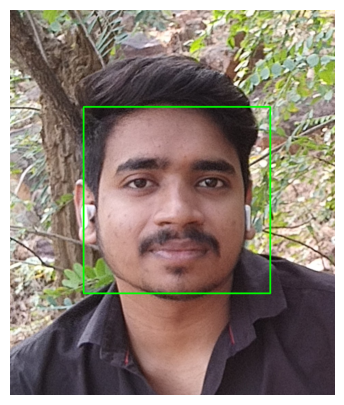

In [16]:
plt.figure(figsize=(10,5))
plt.imshow(img_rgb)
plt.axis('off')

1. **plt.figure(figsize=(10, 5))**: This line creates a new figure for the plot with a specified size of 10 inches in width and 5 inches in height. This sets up the dimensions of the plot window.

2. **plt.imshow(img_rgb)**: This function displays the image (`img_rgb`) on the plot. Matplotlib automatically understands that `img_rgb` is in RGB format due to the color conversion performed earlier. Therefore, it displays the image with the correct color representation.

3. **plt.axis('off')**: This line turns off the axis of the plot, meaning no axis ticks or labels will be shown around the image.

Overall, this code segment will display the image (`img_rgb`) using Matplotlib with the specified dimensions and without axis ticks or labels.

In [18]:
video_capture = cv2.VideoCapture(0)

In [20]:
def detect_bounding_box(vid):
    gray_image = cv2.cvtColor(vid, cv2.COLOR_BGR2GRAY)
    faces = face_classifier.detectMultiScale(gray_image, 1.1, 2, minSize=(40, 40))
    for (x, y, w, h) in faces:
        cv2.rectangle(vid, (x, y), (x + w, y + h), (0, 255, 0), 4)
    return faces

This Python function, `detect_bounding_box`, takes a video frame (`vid`) as input, detects faces in the frame, draws bounding boxes around the detected faces, and returns the coordinates of the detected faces. Here's a breakdown of the function:

1. **Input Argument**:
   - `vid`: This argument represents a single frame of a video. It's expected to be in BGR format.

2. **Convert to Grayscale**:
   - `gray_image = cv2.cvtColor(vid, cv2.COLOR_BGR2GRAY)`: This line converts the BGR frame to grayscale using `cv2.cvtColor()` function. Face detection often works better in grayscale as it simplifies the image and reduces computational complexity.

3. **Face Detection**:
   - `faces = face_classifier.detectMultiScale(gray_image, 1.1, 2, minSize=(40, 40))`: This line detects faces in the grayscale image using the `detectMultiScale()` method of the `face_classifier` cascade classifier. It returns a list of rectangles representing the bounding boxes of the detected faces.

4. **Drawing Bounding Boxes**:
   - The `for` loop iterates over each detected face's bounding box and draws a green rectangle around it using `cv2.rectangle()`.

5. **Return Detected Faces**:
   - `return faces`: This line returns the list of detected faces (bounding box coordinates) to the caller.

Overall, this function detects faces in a video frame, draws bounding boxes around the detected faces, and returns the coordinates of the detected faces. It's a basic implementation of real-time face detection in video streams.

In [21]:
while True:
    result, video_frame = video_capture.read()  # read frames from the video
    if result is False:
        break  # terminate the loop if the frame is not read successfully
    faces = detect_bounding_box(video_frame)  # apply the function we created to the video frame
    cv2.imshow("My Face Detection Project", video_frame)  # display the processed frame in a window named "My Face Detection Project"
    if cv2.waitKey(1) & 0xFF == 27:
        break
video_capture.release()
cv2.destroyAllWindows()

This revised version of the code appears to be the same as the previous one, with a slight modification in the quit mechanism. Instead of checking for the "q" key press, it checks for the Esc key press (ASCII value 27), which is a more standard way of quitting applications. Here's the breakdown:

1. **Video Loop**: The code starts an infinite loop to continuously process video frames until terminated by the user.

2. **Read Video Frames**: It reads a frame from the video source (`video_capture`) using the `read()` method.

3. **Face Detection**: It applies the `detect_bounding_box()` function to detect faces in the current video frame.

4. **Display Processed Frame**: The processed frame with bounding boxes around detected faces is displayed in a window named "My Face Detection Project" using `cv2.imshow()`.

5. **Quit Mechanism**: It checks for the Esc key press (`27` in ASCII). If the Esc key is pressed, the loop breaks, and the program terminates.

6. **Release Resources**: After the loop exits, it releases the video capture object to free up resources.

7. **Close Windows**: Finally, it closes all OpenCV windows.

This code creates a real-time face detection system from a video source, continuously detecting faces in each frame, and displaying the processed frames with bounding boxes around the detected faces. The system runs until the user quits by pressing the Esc key.